# A Classifier Recognizing Smiling Faces

Implement a classifier in Keras. This model can recognize people's face and classify them as "happy" or "not happy".

<img src="face_images.png" style="width:550px;height:250px;">

In [1]:
# import the packages
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


## 1 - Load the Dataset

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


## 2 - Building a model in Keras

Keras is very good for rapid prototyping. In just a short time you will be able to build a model that achieves outstanding results.

#### Objects as functions
* Notice how there are two pairs of parentheses in each statement.  For example:
```
X = ZeroPadding2D((3, 3))(X_input)
```
* The first is a constructor call which creates an object (ZeroPadding2D()).
* The single line is equivalent to this:
```
ZP = ZeroPadding2D((3, 3)) # ZP is an object that can be called as a function
X = ZP(X_input) 
```

#### Variable naming convention

* Note that Keras uses a different convention with variable names than we've previously used with numpy and TensorFlow. 
* Instead of creating unique variable names for each step and each layer, such as 
```
X = ...
Z1 = ...
A1 = ...
```
* Keras re-uses and overwrites the same variable at each step:
```
X = ...
X = ...
X = ...
```
* The exception is `X_input`, which we kept separate since it's needed later.

In [3]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', then you can provide the input_shape using
        X_train.shape[1:]

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input placeholder
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    
    # CON --> BN --> ReLU block applied to X
    X = Conv2D(32, (3,3), strides = (1,1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)
    
    # MAXPOOL
    X = MaxPooling2D((2,2), name='max_pool')(X)
    
    # Flatten X + Fullyconnected
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

## 3 - Training and testing the model

4 Steps:
1. Create the model by calling the function above.
2. Compile the model by calling `model.compile(optimizer='...', loss='...', metrics=['accuracy'])`
3. Train the model on training data by calling `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`
4. Test the model on test data by calling `model.evaluate(x = ..., y = ...)`

#### Step 1: create the model

In [4]:
happyModel = HappyModel(X_train.shape[1:])

#### Step 2:  compile the model

In [5]:
happyModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Step 3: train the model

In [6]:
happyModel.fit(x=X_train, y=Y_train, epochs=10, batch_size=50)

Epoch 1/10
600/600 [==============================] - 4s 7ms/step - loss: 2.4718 - accuracy: 0.5417
Epoch 2/10
600/600 [==============================] - 3s 6ms/step - loss: 0.4564 - accuracy: 0.8117
Epoch 3/10
600/600 [==============================] - 3s 6ms/step - loss: 0.2441 - accuracy: 0.9067
Epoch 4/10
600/600 [==============================] - 3s 6ms/step - loss: 0.1718 - accuracy: 0.9300
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.1208 - accuracy: 0.9633
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0853 - accuracy: 0.9767
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0791 - accuracy: 0.9733
Epoch 8/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0739 - accuracy: 0.9800
Epoch 9/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0803 - accuracy: 0.9783
Epoch 10/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0596 - accuracy: 0.9883

#### Step 4: evaluate the model

In [7]:
preds = happyModel.evaluate(x=X_test, y=Y_test)
print()
print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 0s 3ms/step

Loss = 0.4462598431110382
Test Accuracy = 0.9133333563804626


## 4 - Test with your own image

[[1.]]


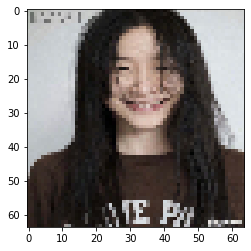

In [8]:
img_path = 'my_image.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))